<a href="https://colab.research.google.com/github/Adewole-211/Python-for-Data-Analysis/blob/main/Bitcoin_for_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

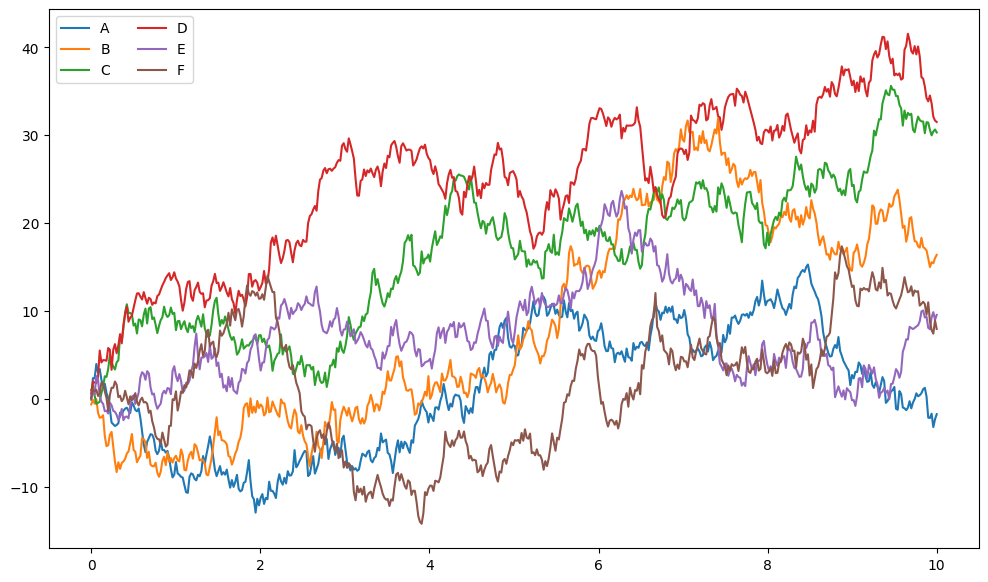

In [7]:
plt.figure(figsize=(12,7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [8]:
import requests
import pandas as pd

In [9]:
import requests
import pandas as pd

def get_historic_price(symbol, after='2018-09-01'):
    # Map common names to Kraken-compatible symbols
    symbol_map = {
        'btc': 'XBT',
        'eth': 'ETH',
        'ltc': 'LTC',
        # Add more as needed
    }

    base_symbol = symbol_map.get(symbol.lower(), symbol.upper())
    pair = f"{base_symbol}USD"  # Kraken expects e.g., XBTUSD, ETHUSD

    url = 'https://api.kraken.com/0/public/OHLC'
    since_timestamp = int(pd.Timestamp(after).timestamp())

    response = requests.get(url, params={
        'pair': pair,
        'interval': 60,  # 1-hour candles
        'since': since_timestamp
    })

    # Raise error if bad response
    response.raise_for_status()
    data = response.json()

    # Check for Kraken-specific error format
    if data.get('error'):
        raise ValueError(f"Kraken API Error: {data['error']}")

    # Get data under the pair key
    result_keys = [k for k in data['result'].keys() if k != 'last']
    if not result_keys:
        raise ValueError("No result data found in API response.")
    result_key = result_keys[0]

    raw_data = data['result'][result_key]

    # Format to DataFrame
    df = pd.DataFrame(raw_data, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice',
        'VWAP', 'Volume', 'Count'
    ])

    # Convert data types
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume']] = df[[
        'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ]].astype(float)

    df.set_index('CloseTime', inplace=True)

    return df[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume']]



In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2025-05-12 11:51:09.843822')

In [13]:
btc_df = get_historic_price('btc', after='2024-01-01')
print(btc_df.head())

                     OpenPrice  HighPrice  LowPrice  ClosePrice     Volume
CloseTime                                                                 
2025-04-19 13:00:00    85284.1    85450.0   85239.0     85450.0  12.741301
2025-04-19 14:00:00    85450.0    85470.0   85355.0     85373.9  31.211226
2025-04-19 15:00:00    85373.9    85611.7   85131.1     85180.7  41.667641
2025-04-19 16:00:00    85180.7    85311.2   84731.2     84826.0  32.855273
2025-04-19 17:00:00    84826.0    85198.9   84825.9     85198.9  21.301938


In [14]:
btc_df.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-04-19 13:00:00,85284.1,85450.0,85239.0,85450.0,12.741301
2025-04-19 14:00:00,85450.0,85470.0,85355.0,85373.9,31.211226
2025-04-19 15:00:00,85373.9,85611.7,85131.1,85180.7,41.667641
2025-04-19 16:00:00,85180.7,85311.2,84731.2,84826.0,32.855273
2025-04-19 17:00:00,84826.0,85198.9,84825.9,85198.9,21.301938
